# Eksplorasi Data (NO2 Sidoarjo)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Membaca Dataset

In [4]:
df = pd.read_csv('data-copernicus/timeseries.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df

,date,feature_index,NO2
4,2022-09-30 00:00:00+00:00,0,NaN
1,2022-10-01 00:00:00+00:00,0,NaN
0,2022-10-02 00:00:00+00:00,0,0.000048
6,2022-10-03 00:00:00+00:00,0,0.000040
3,2022-10-04 00:00:00+00:00,0,NaN
...,...,...,...
760,2025-09-26 00:00:00+00:00,0,0.000030
754,2025-09-27 00:00:00+00:00,0,0.000036
759,2025-09-28 00:00:00+00:00,0,0.000015
24,2025-09-29 00:00:00+00:00,0,0.000031


## Jumlah Missing Value

C:\Users\Harseven\AppData\Local\Temp\ipykernel_17464\4243173396.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 0.5, f"{v} ({missing_percent[i]:.1f}%)",


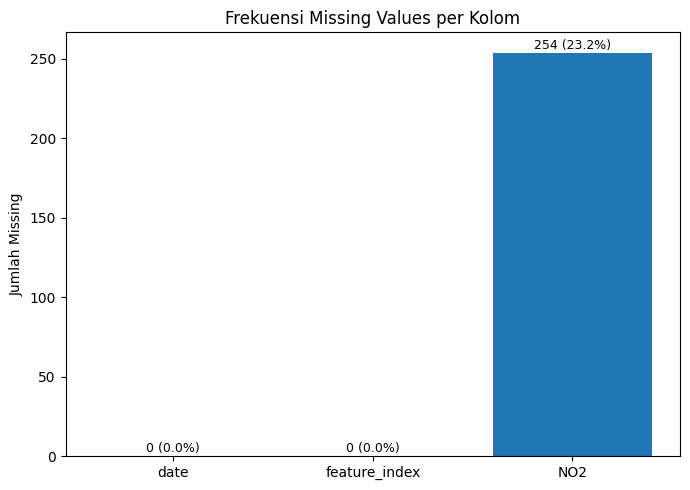

,Missing Count,Missing Percent (%)
date,0,0.00
feature_index,0,0.00
NO2,254,23.15


In [5]:
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

fig, ax = plt.subplots(figsize=(7,5))

bars = ax.bar(missing_count.index, missing_count)

ax.set_title("Frekuensi Missing Values per Kolom")
ax.set_ylabel("Jumlah Missing")

for i, v in enumerate(missing_count):
    ax.text(i, v + 0.5, f"{v} ({missing_percent[i]:.1f}%)",
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

missing_table = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent (%)': missing_percent.round(2)
})

missing_table

## Statistik deskriptif

In [ ]:
desc = df.describe()
desc

## Tabel Informasi Dataset

In [6]:
info_table = pd.DataFrame({
    "Kolom": df.columns,
    "Tipe Data": df.dtypes.astype(str),
    "Jumlah Data Tidak Kosong": len(df) - df.isna().sum(),
    "Jumlah Missing": df.isna().sum()
})
info_table

,Kolom,Tipe Data,Jumlah Data Tidak Kosong,Jumlah Missing
date,date,"datetime64[ns, UTC]",1097,0
feature_index,feature_index,int64,1097,0
NO2,NO2,float64,843,254


## Visualisasi Time Series NO₂

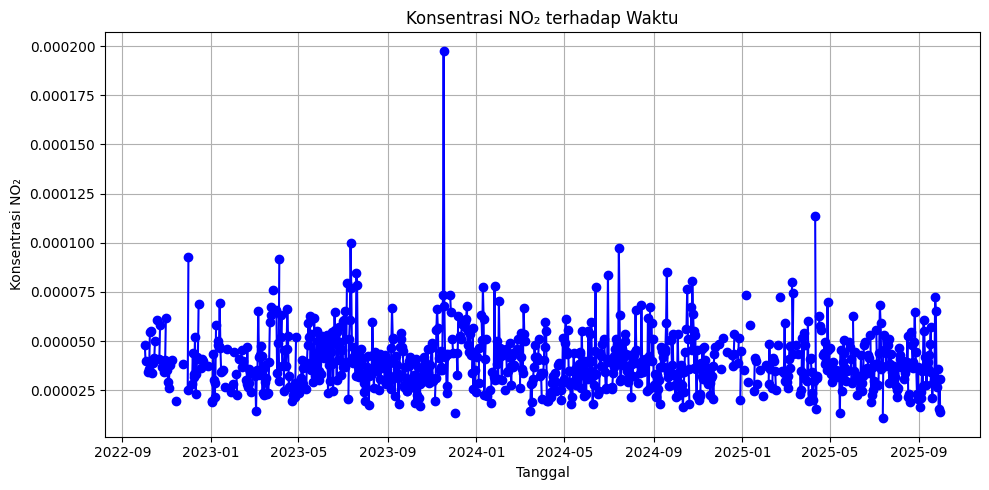

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['NO2'], marker='o', linestyle='-', color='blue')
plt.title("Konsentrasi NO₂ terhadap Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Konsentrasi NO₂")
plt.grid(True)
plt.tight_layout()
plt.show()